# 통신사 고객 이탈 데이터

- 라이브러리 임포트(import)  
- 데이터 가져오기(Loading the data)  
- 데이터 전처리(Data PreProcessing) : 카테고리 데이터, 더미특성 생성, 특성 추출 (feature engineering) 등  
- Train, Test  데이터셋 분할  
- 데이터 정규화(Normalizing the Data)  
- 모델 개발(Creating the Model)  
- 모델 성능 평가

### 라이브러리 임포트

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input

### 탐색적 데이터 분석 결과 탑재

In [2]:
# 구글 드라이브
from google.colab import drive
drive.mount('/content/drive')

rootdir = "/content/drive/MyDrive/인공지능 사관학교/Coding/7월/data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read churn data
df = pd.read_csv(rootdir + '/processed_churn_data.csv')
# df = pd.read_csv('../data/processed_churn_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### 더미 특성 생성

In [6]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod']

In [7]:
# One-hot encoding : get_dummies
dummies = pd.get_dummies(df[cols], drop_first=True)

In [8]:
# drop columns
df = df.drop(cols, axis=1)

In [9]:
# concat
df = pd.concat([df, dummies], axis=1)

In [10]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [11]:
df.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True


###  Train, Test  데이터셋 분할

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [14]:
# train_test_splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [15]:
# shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 23), (2113, 23), (4930,), (2113,))

### 데이터 정규화/스케일링(Normalizing/Scaling)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[0]

array([0.        , 0.61111111, 0.02340637, 0.10662307, 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

###  모델 구성

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input((23,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

### 모델 확인

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,809 (30.50 KB)

 Trainable params: 7,809 (30.50 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델 컴파일 – 이진 분류 모델

In [21]:
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

- 모델 컴파일 – 다중 분류 모델  
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

### 모델 훈련(학습) 하기

In [22]:
from tqdm.keras import TqdmCallback

history = model.fit(
                X_train,
                y_train,
                batch_size=32,
                epochs=30,
                validation_data=(X_test, y_test),
                verbose=0,
                callbacks=[TqdmCallback()]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

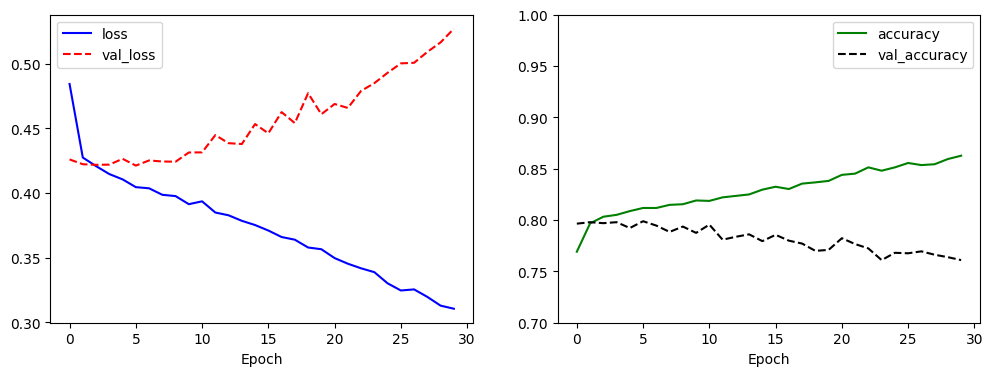

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

### 평가

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도: {accuracy:.4f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7610 - loss: 0.5195
테스트 손실: 0.5272
테스트 정확도: 0.7610


In [25]:
from sklearn.metrics import classification_report
y_pred_proba = model.predict(X_test)
y_pred_proba


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.5803886 ],
       [0.03737428],
       [0.00323503],
       ...,
       [0.04364493],
       [0.08606204],
       [0.7406369 ]], dtype=float32)

In [26]:
# 확률을 0 또는 1로 변환 (임계값 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1556
           1       0.55      0.52      0.54       557

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.69      2113
weighted avg       0.76      0.76      0.76      2113



### 모델 훈련(학습) - 조기종료

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

과적합 방지

In [37]:
model2 = keras.Sequential()
model2.add(Input(shape=(23,)))
# model2.add(Dense(128, activation='relu'))
# model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,809 (30.50 KB)

 Trainable params: 7,809 (30.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=0,
                           patience=25)

In [39]:
check_point = ModelCheckpoint('models/churn_best_model.h5',
                              monitor='val_loss',
                              mode='min',
                              verbose=1,
                              save_best_only=True)

In [40]:
model2.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

In [41]:
history2 = model2.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[TqdmCallback(), early_stop, check_point]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_loss improved from inf to 0.45253, saving model to models/churn_best_model.h5



Epoch 2: val_loss improved from 0.45253 to 0.43678, saving model to models/churn_best_model.h5



Epoch 3: val_loss improved from 0.43678 to 0.43013, saving model to models/churn_best_model.h5



Epoch 4: val_loss improved from 0.43013 to 0.42330, saving model to models/churn_best_model.h5



Epoch 5: val_loss did not improve from 0.42330

Epoch 6: val_loss did not improve from 0.42330

Epoch 7: val_loss did not improve from 0.42330

Epoch 8: val_loss did not improve from 0.42330

Epoch 9: val_loss improved from 0.42330 to 0.42255, saving model to models/churn_best_model.h5



Epoch 10: val_loss improved from 0.42255 to 0.42173, saving model to models/churn_best_model.h5



Epoch 11: val_loss did not improve from 0.42173

Epoch 12: val_loss did not improve from 0.42173

Epoch 13: val_loss improved from 0.42173 to 0.42115, saving model to models/churn_best_model.h5



Epoch 14: val_loss improved from 0.42115 to 0.41987, saving model to models/churn_best_model.h5



Epoch 15: val_loss did not improve from 0.41987

Epoch 16: val_loss did not improve from 0.41987

Epoch 17: val_loss did not improve from 0.41987

Epoch 18: val_loss did not improve from 0.41987

Epoch 19: val_loss improved from 0.41987 to 0.41845, saving model to models/churn_best_model.h5



Epoch 20: val_loss did not improve from 0.41845

Epoch 21: val_loss did not improve from 0.41845

Epoch 22: val_loss did not improve from 0.41845

Epoch 23: val_loss did not improve from 0.41845

Epoch 24: val_loss did not improve from 0.41845

Epoch 25: val_loss did not improve from 0.41845

Epoch 26: val_loss did not improve from 0.41845

Epoch 27: val_loss did not improve from 0.41845

Epoch 28: val_loss did not improve from 0.41845

Epoch 29: val_loss did not improve from 0.41845

Epoch 30: val_loss did not improve from 0.41845

Epoch 31: val_loss did not improve from 0.41845

Epoch 32: val_loss did not improve from 0.41845

Epoch 33: val_loss did not improve from 0.41845

Epoch 34: val_loss did not improve from 0.41845

Epoch 35: val_loss did not improve from 0.41845

Epoch 36: val_loss did not improve from 0.41845

Epoch 37: val_loss did not improve from 0.41845

Epoch 38: val_loss did not improve from 0.41845

Epoch 39: val_loss did not improve from 0.41845

Epoch 40: val_loss 

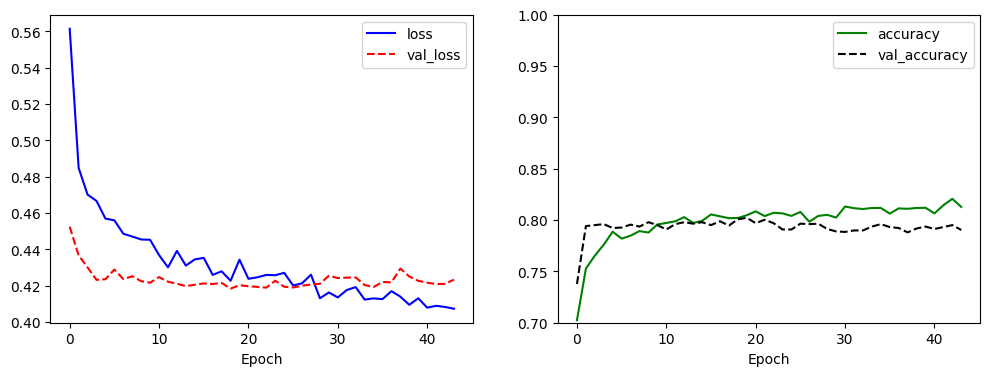

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], 'b-', label='loss')
plt.plot(history2.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], 'g-', label='accuracy')
plt.plot(history2.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [44]:
loss, accuracy = model2.evaluate(X_test, y_test)

print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도: {accuracy:.4f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7941 - loss: 0.4239
테스트 손실: 0.4234
테스트 정확도: 0.7903


---


# "실습"

1. units 수를 늘려 테스트
    - Oferffitting 방지를 위해 regulation 과 dropout 적용

